
**Parte 2: Procesamiento de información (9 puntos)**

Realizaremos un análisis exploratorio de la base de datos entregada. A lo largo
de cada etapa de esta sección, podrá modificar la codificación de las variables
o construir nuevas según lo considere conveniente (por ejemplo, dummies,
categóricas, logarítmicas, cruzadas, etc.). Además, enfocando algunos análisis
en la variable objetivo (ingresos laborales), debe abordar los siguientes puntos
(la creatividad en el análisis es un valor añadido):


In [2]:
import pandas as pd
# Ajustar las opciones de visualización para mostrar todas las columnas
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
pip install pyarrow

   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ------ --------------------------------- 4.2/25.7 MB 27.4 MB/s eta 0:00:01
   -------------- ------------------------- 9.4/25.7 MB 23.7 MB/s eta 0:00:01
   -------------- ------------------------- 9.4/25.7 MB 23.7 MB/s eta 0:00:01
   ------------------- -------------------- 12.3/25.7 MB 14.8 MB/s eta 0:00:01
   -------------------------- ------------- 16.8/25.7 MB 16.4 MB/s eta 0:00:01
   -------------------------- ------------- 16.8/25.7 MB 16.4 MB/s eta 0:00:01
   -------------------------------- ------- 20.7/25.7 MB 14.4 MB/s eta 0:00:01
   ---------------------------------------  25.4/25.7 MB 15.8 MB/s eta 0:00:01
   ---------------------------------------- 25.7/25.7 MB 15.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#Realizaremos un análisis exploratorio de la base de datos entregada.
bd = pd.read_parquet("../data/raw/base_proyecto_final.parquet")
bd


,year,conglome,vivienda,hogar,codperso,ubigeo,estrato,age,d544t,fac500a,parent,nucleo,parent_fam,civil,jefe,couple,lenguacat,educ,niv_edu_g,edu_prim,edu_sec_incomp,edu_sec_comp,edu_sup_incomp,edu_sup_comp,sch,estatal,mieperho,ingfam,gasfam,pobreza,ypc,gpc,ingfammen,lningfam,gasfammen,lngasfam,male,age_sq,raza,dpto,urban,zona,ciuo,gruocu,h_skill,m_skill,l_skill,ciiu,ramact,ramactsec,contrato,tenure,tenure_sq,exper,exper_sq,pea,ing_lab,ing_total,ln_ing,ln_ing_lab,muestra
0,2017,005001,002,11,02,010101,de 20 000 a 49 999 habitantes,43,NaN,126.542603,Hijo(a),1.0,Hijo(a),Soltero(a),No,No,Castellano,Secundaria,Secundaria completa,1.0,0.0,0.0,0.0,0.0,11.0,Estatal,3,56533.277791,38236.044552,no pobre,18844.425781,12745.348633,4711.106445,8.457678,3186.337158,8.066628,Hombre,1849.0,Mestizo,Amazonas,urbano,Sierra,335.0,Profesionales técnicos,1.0,0.0,0.0,7523.0,Administración pública y defensa,Sector Terciario,Con Contrato,0.0,0.0,26.0,676.0,PEA Ocupada,1299.833374,1299.833374,7.169991,7.169991,1.0
1,2017,005001,002,11,03,010101,de 20 000 a 49 999 habitantes,46,NaN,68.433701,Hijo(a),0.0,Jefe(a),Separado(a),Yes,No,Castellano,Secundaria,Secundaria completa,1.0,0.0,0.0,0.0,0.0,11.0,Estatal,3,56533.277791,38236.044552,no pobre,18844.425781,12745.348633,4711.106445,8.457678,3186.337158,8.066628,Hombre,2116.0,Mestizo,Amazonas,urbano,Sierra,523.0,Trabajadores de los servicios y vendedores de ...,0.0,1.0,0.0,5520.0,Hoteles y restaurantes,Sector Terciario,Sin Contrato,2.0,4.0,29.0,841.0,PEA Ocupada,1500.333374,1500.333374,7.313443,7.313443,1.0
2,2017,005001,023,11,01,010101,de 20 000 a 49 999 habitantes,44,NaN,126.542603,Jefe(a),1.0,Jefe(a),Conviviente,Yes,Yes,Castellano,Secundaria,Secundaria incompleta,1.0,0.0,0.0,0.0,0.0,7.0,Estatal,6,19463.577593,13082.178226,pobre no extremo,3243.929688,2180.363037,1621.964844,7.391394,1090.181519,6.994100,Hombre,1936.0,Mestizo,Amazonas,urbano,Sierra,983.0,Ocupaciones elementales,0.0,0.0,1.0,4520.0,Construcción,Sector Secundario,Sin Contrato,0.0,0.0,31.0,961.0,PEA Ocupada,1292.666626,1292.666626,7.164463,7.164463,1.0
3,2017,005001,035,11,02,010101,de 20 000 a 49 999 habitantes,71,NaN,48.459030,Esposo(a),1.0,Esposo(a),Casado(a),No,Yes,Castellano,Primaria,Primaria,1.0,0.0,0.0,0.0,0.0,2.0,Estatal,2,10114.191599,10487.156982,no pobre,5057.095703,5243.578613,842.849304,6.736788,873.929749,6.773000,Hombre,5041.0,Mestizo,Amazonas,urbano,Sierra,861.0,"Trabajadores de la construcción, edificación, ...",0.0,0.0,1.0,4540.0,Construcción,Sector Secundario,nan,0.0,0.0,63.0,3969.0,PEA Ocupada,325.000000,325.000000,5.783825,5.783825,0.0
4,2017,005001,046,11,01,010101,de 20 000 a 49 999 habitantes,36,NaN,126.542603,Jefe(a),1.0,Jefe(a),Conviviente,Yes,Yes,Castellano,Primaria,Primaria,1.0,0.0,0.0,0.0,0.0,3.0,Estatal,3,43630.136278,29808.449931,no pobre,14543.378906,9936.150391,3635.844727,8.198597,2484.037598,7.817641,Hombre,1296.0,Mestizo,Amazonas,urbano,Sierra,885.0,"Operadores de maquinaria industrial, ensamblad...",0.0,0.0,1.0,6023.0,"Transporte, almacenamiento y comunicaciones",Sector Terciario,Sin Contrato,0.0,0.0,27.0,729.0,PEA Ocupada,1742.750000,1742.750000,7.463220,7.463220,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64910,2017,010801,025,11,01,230110,de 100 000 a 499 999 habitantes,27,1002.0,62.477489,Jefe(a),0.0,Jefe(a),Soltero(a),Yes,No,Castellano,Superior universitaria,Superior completa,0.0,1.0,0.0,0.0,0.0,16.0,No Estatal,1,28048.000000,23744.476173,no pobre,28048.000000,23744.476562,2337.333252,7.756766,1978.706299,7.590199,Hombre,729.0,Mestizo,Tacna,urbano,Costa,372.0,Profesionales técnicos,1.0,0.0,0.0,6603.0,Intermediación financiera,Sector Terciario,Con Contrato,1.0,1.0,5.0,25.0,PEA Ocupada,2503.500000,2587.000000,7.858254,7.825445,1.0
64911,2017,010801,030,11,01,230110,de 100 000 a 499 999 habitantes,67,N

**Imprime un resumen estadístico y descripción general de los datos (1 punto)**


In [5]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64915 entries, 0 to 64914
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            64915 non-null  int16   
 1   conglome        64915 non-null  object  
 2   vivienda        64915 non-null  object  
 3   hogar           64915 non-null  object  
 4   codperso        64915 non-null  object  
 5   ubigeo          64915 non-null  object  
 6   estrato         64915 non-null  category
 7   age             64915 non-null  int8    
 8   d544t           11287 non-null  float64 
 9   fac500a         64915 non-null  float32 
 10  parent          64640 non-null  category
 11  nucleo          64640 non-null  float64 
 12  parent_fam      64640 non-null  category
 13  civil           64640 non-null  category
 14  jefe            64640 non-null  category
 15  couple          64640 non-null  category
 16  lenguacat       64910 non-null  category
 17  educ            6

In [6]:
bd.describe()

,year,age,d544t,fac500a,nucleo,edu_prim,edu_sec_incomp,edu_sec_comp,edu_sup_incomp,edu_sup_comp,sch,mieperho,ingfam,gasfam,ypc,gpc,ingfammen,lningfam,gasfammen,lngasfam,age_sq,ciuo,h_skill,m_skill,l_skill,ciiu,tenure,tenure_sq,exper,exper_sq,ing_lab,ing_total,ln_ing,ln_ing_lab,muestra
count,64915.0,64915.000000,11287.000000,64915.000000,64640.000000,64910.000000,64910.000000,64910.0,64910.0,64910.0,64897.000000,64915.000000,64915.000000,64915.000000,64915.000000,64915.000000,64915.000000,64915.000000,64915.000000,64915.000000,64915.000000,64915.000000,64915.000000,64915.000000,64915.000000,64915.000000,64913.000000,64913.000000,64897.000000,64897.000000,56239.000000,56239.000000,56239.000000,56239.000000,64915.000000
mean,2017.0,42.713656,3499.209710,258.176880,0.959638,0.816438,0.183562,0.0,0.0,0.0,9.027844,4.275283,37057.020962,28660.148392,9691.868164,7464.254395,3088.084961,7.653715,2388.345947,7.527503,2093.103760,690.625244,0.122206,0.413556,0.464238,3734.852783,8.962396,222.680786,27.688259,1117.985229,1178.991821,1237.515259,6.560437,6.538208,0.885312
std,0.0,16.390589,6384.701565,249.623322,0.456185,0.387129,0.387129,0.0,0.0,0.0,4.864258,2.056144,37727.685675,21609.710082,11070.842773,6107.492676,3143.973877,0.902045,1800.809204,0.732477,1510.450317,240.147018,0.327526,0.492475,0.498723,3157.789307,11.931406,485.007294,18.744356,1259.106079,1450.731079,1587.795166,1.164112,1.143155,0.318648
min,2017.0,14.000000,16.000000,1.761926,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,737.153387,789.675692,194.744247,347.553925,61.429447,4.117889,65.806305,4.186716,196.000000,11.000000,0.000000,0.000000,0.000000,111.000000,0.000000,0.000000,-2.000000,0.000000,2.000000,2.000000,0.693147,0.693147,0.000000
25%,2017.0,30.000000,819.500000,102.209572,1.000000,1.000000,0.000000,0.0,0.0,0.0,5.000000,3.000000,13867.382268,13872.179590,3783.326416,3692.504395,1155.615234,7.052388,1156.014954,7.052734,900.000000,572.000000,0.000000,0.000000,0.000000,130.000000,0.000000,0.000000,12.000000,144.000000,357.833344,358.083313,5.880766,5.880067,1.000000
50%,2017.0,42.000000,1104.000000,182.905701,1.000000,1.000000,0.000000,0.0,0.0,0.0,11.000000,4.000000,27051.501962,23274.551109,6856.127441,5867.939453,2254.291748,7.720591,1939.545898,7.570209,1764.000000,615.000000,0.000000,0.000000,0.000000,5020.000000,3.000000,9.000000,26.000000,676.000000,850.166687,855.833313,6.752076,6.745432,1.000000
75%,2017.0,54.000000,3823.000000,311.938690,1.000000,1.000000,0.000000,0.0,0.0,0.0,12.000000,5.000000,47309.190329,37280.367896,11835.955078,9244.962402,3942.432617,8.279553,3106.697388,8.041315,2916.000000,942.000000,0.000000,1.000000,1.000000,6022.000000,14.000000,196.000000,41.000000,1681.000000,1492.250000,1535.500000,7.336611,7.308040,1.000000
max,2017.0,98.000000,154206.000000,2050.473633,5.000000,1.000000,1.000000,0.0,0.0,0.0,18.000000,21.000000,772552.223693,560358.267186,327770.843750,140089.562500,64379.351562,11.072548,46696.523438,10.751425,9604.000000,987.000000,1.000000,1.000000,1.000000,9900.000000,75.000000,5625.000000,92.000000,8464.000000,53978.000000,54564.167969,10.907133,10.896332,1.000000


PARA EL ESTUDIO DE NUESTRA VARIABLE OBJETIVO: INGRESOS LABORALES, VAMOS A QUEDARNOS CON EL DEPARTAMENTO DE LAMBAYEQUE.

In [7]:
departamentos = {
    '01': 'Amazonas', '02': 'Áncash', '03': 'Apurímac', '04': 'Arequipa', '05': 'Ayacucho',
    '06': 'Cajamarca', '07': 'Callao', '08': 'Cusco', '09': 'Huancavelica', '10': 'Huánuco',
    '11': 'Ica', '12': 'Junín', '13': 'La Libertad', '14': 'Lambayeque', '15': 'Lima',
    '16': 'Loreto', '17': 'Madre de Dios', '18': 'Moquegua', '19': 'Pasco', '20': 'Piura',
    '21': 'Puno', '22': 'San Martín', '23': 'Tacna', '24': 'Tumbes', '25': 'Ucayali'
}

# Cargar el DataFrame desde un archivo .parquet
bd = pd.read_parquet("../data/raw/base_proyecto_final.parquet")

# Crear la columna 'id_dep' usando los primeros dos dígitos de 'ubigeo'
bd['id_dep'] = bd['ubigeo'].str[:2]

# Crear la columna 'departamento' usando la lista de departamentos del Perú
bd['departamento'] = bd['id_dep'].replace(departamentos)

# Filtrar solo para el departamento de Lambayeque
lambayeque = bd[bd['departamento'] == 'Lambayeque']
lambayeque



,year,conglome,vivienda,hogar,codperso,ubigeo,estrato,age,d544t,fac500a,parent,nucleo,parent_fam,civil,jefe,couple,lenguacat,educ,niv_edu_g,edu_prim,edu_sec_incomp,edu_sec_comp,edu_sup_incomp,edu_sup_comp,sch,estatal,mieperho,ingfam,gasfam,pobreza,ypc,gpc,ingfammen,lningfam,gasfammen,lngasfam,male,age_sq,raza,dpto,urban,zona,ciuo,gruocu,h_skill,m_skill,l_skill,ciiu,ramact,ramactsec,contrato,tenure,tenure_sq,exper,exper_sq,pea,ing_lab,ing_total,ln_ing,ln_ing_lab,muestra,id_dep,departamento
27662,2017,007287,007,11,01,140101,de 100 000 a 499 999 habitantes,38,NaN,367.409760,Jefe(a),1.0,Jefe(a),Casado(a),Yes,Yes,Castellano,Secundaria,Secundaria completa,1.0,0.0,0.0,0.0,0.0,11.0,Estatal,4,18280.652559,28162.067467,no pobre,4570.163086,7040.517090,1523.387695,7.328692,2346.838867,7.760825,Hombre,1444.0,Mestizo,Lambayeque,urbano,Costa,983.0,Ocupaciones elementales,0.0,0.0,1.0,4520.0,Construcción,Sector Secundario,Sin Contrato,1.0,1.0,21.0,441.0,PEA Ocupada,1294.916626,1294.916626,7.166202,7.166202,1.0,14,Lambayeque
27663,2017,007287,024,11,01,140101,de 100 000 a 499 999 habitantes,50,NaN,297.128448,Jefe(a),0.0,Jefe(a),Separado(a),Yes,No,Castellano,Primaria,Primaria,1.0,0.0,0.0,0.0,0.0,3.0,Estatal,1,4441.511697,5280.574751,no pobre,4441.511719,5280.574707,370.125977,5.913844,440.047882,6.086884,Mujer,2500.0,Blanco,Lambayeque,urbano,Costa,623.0,Agricultores y trabajadores calificados agrope...,0.0,1.0,0.0,122.0,"Agricultura, ganadería, silvicultura",Sector Primario,nan,0.0,0.0,41.0,1681.0,PEA Ocupada,126.534721,126.534721,4.840517,4.840517,1.0,14,Lambayeque
27664,2017,007287,040,11,01,140101,de 100 000 a 499 999 habitantes,44,NaN,358.570435,Jefe(a),1.0,Jefe(a),Separado(a),Yes,No,Castellano,Primaria,Primaria,1.0,0.0,0.0,0.0,0.0,6.0,Estatal,7,29040.818403,26423.025795,pobre no extremo,4148.688477,3774.718018,2420.068115,7.791551,2201.918701,7.697084,Mujer,1936.0,Mestizo,Lambayeque,urbano,Costa,573.0,Trabajadores de los servicios y vendedores de ...,0.0,1.0,0.0,1541.0,Industrias Manufactureras,Sector Secundario,Sin Contrato,8.0,64.0,32.0,1024.0,PEA Ocupada,1102.750000,1102.750000,7.005562,7.005562,1.0,14,Lambayeque
27665,2017,007287,040,11,02,140101,de 100 000 a 499 999 habitantes,25,NaN,367.409760,Hijo(a),1.0,Hijo(a),Soltero(a),No,No,Castellano,Secundaria,Secundaria incompleta,1.0,0.0,0.0,0.0,0.0,9.0,Estatal,7,29040.818403,26423.025795,pobre no extremo,4148.688477,3774.718018,2420.068115,7.791551,2201.918701,7.697084,Hombre,625.0,Mestizo,Lambayeque,urbano,Costa,931.0,Ocupaciones elementales,0.0,0.0,1.0,6021.0,"Transporte, almacenamiento y comunicaciones",Sector Terciario,Sin Contrato,0.0,0.0,10.0,100.0,PEA Ocupada,996.833313,996.833313,6.904583,6.904583,1.0,14,Lambayeque
27666,2017,007287,091,11,01,140101,de 100 000 a 499 999 habitantes,52,1141.0,338.810211,Jefe(a),1.0,Jefe(a),Casado(a),Yes,Yes,Castellano,Superior universitaria,Superior completa,0.0,1.0,0.0,0.0,0.0,16.0,Estatal,3,70446.000000,48722.642256,no pobre,23482.000000,16240.880859,5870.500000,8.677695,4060.220215,8.308992,Hombre,2704.0,Mestizo,Lambayeque,urbano,Costa,254.0,Profesionales científicos e intelectuales,1.0,0.0,0.0,7511.0,Administración pública y defensa,Sector Terciario,Con Contrato,9.0,81.0,30.0,900.0,PEA Ocupada,3263.416748,3358.500000,8.119249,8.090530,1.0,14,Lambayeque
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60963,2017,010209,070,11,01,140102,Área de empadronamiento rural (aer) compuesto,33,2990.0,171.634323,Jefe(a),1.0,Jefe(a),Conviviente,Yes,Yes,Castellano,Primaria,Primaria,1.0,0.0,0.0,0.0,0.0,2.0,Estatal,4,24750.943286,14683.341173,no pobre,6187.735840,3670.835205,2062.578613,7.631712,1223.611816,7.109562,Hombre,1089.0,Otro,Lambayeque,rural,Costa,971.0,Ocupaciones elementales,0.0,0.0,1.0,113.0,"Agricultura, ganadería, silvicultura",Sector Primario

In [8]:
lambayeque.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 27662 to 60967
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            2877 non-null   int16   
 1   conglome        2877 non-null   object  
 2   vivienda        2877 non-null   object  
 3   hogar           2877 non-null   object  
 4   codperso        2877 non-null   object  
 5   ubigeo          2877 non-null   object  
 6   estrato         2877 non-null   category
 7   age             2877 non-null   int8    
 8   d544t           585 non-null    float64 
 9   fac500a         2877 non-null   float32 
 10  parent          2857 non-null   category
 11  nucleo          2857 non-null   float64 
 12  parent_fam      2857 non-null   category
 13  civil           2857 non-null   category
 14  jefe            2857 non-null   category
 15  couple          2857 non-null   category
 16  lenguacat       2877 non-null   category
 17  educ          

In [9]:
lambayeque.describe()

,year,age,d544t,fac500a,nucleo,edu_prim,edu_sec_incomp,edu_sec_comp,edu_sup_incomp,edu_sup_comp,sch,mieperho,ingfam,gasfam,ypc,gpc,ingfammen,lningfam,gasfammen,lngasfam,age_sq,ciuo,h_skill,m_skill,l_skill,ciiu,tenure,tenure_sq,exper,exper_sq,ing_lab,ing_total,ln_ing,ln_ing_lab,muestra
count,2877.0,2877.000000,585.000000,2877.000000,2857.000000,2877.000000,2877.000000,2877.0,2877.0,2877.0,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2676.000000,2676.000000,2676.000000,2676.000000,2877.000000
mean,2017.0,42.128259,2585.417094,222.116501,1.021001,0.801529,0.198471,0.0,0.0,0.0,9.456378,4.840806,39615.586889,33446.160832,9437.129883,7957.301270,3301.298828,7.868422,2787.179932,7.771185,2027.088257,700.450439,0.130692,0.349670,0.519639,4325.380371,7.517900,168.675354,26.671881,1033.659668,1077.883789,1124.983521,6.506817,6.482148,0.902329
std,0.0,15.886656,4026.466616,101.369759,0.534110,0.398918,0.398918,0.0,0.0,0.0,4.617489,2.484380,33088.893253,20258.401948,9932.346680,5591.547363,2757.407715,0.684334,1688.200195,0.579306,1454.419678,246.456039,0.337121,0.476949,0.499701,3010.414795,10.592239,389.231079,17.955015,1185.057251,1380.118042,1455.359619,1.125278,1.107443,0.296921
min,2017.0,14.000000,50.000000,7.368940,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,1907.002995,2352.005368,649.295410,1420.301147,158.916916,5.068381,196.000443,5.278117,196.000000,11.000000,0.000000,0.000000,0.000000,111.000000,0.000000,0.000000,-1.000000,0.000000,5.916667,5.916667,1.777773,1.777773,0.000000
25%,2017.0,29.000000,857.000000,160.734100,1.000000,1.000000,0.000000,0.0,0.0,0.0,6.000000,3.000000,20503.761222,20066.716733,4730.076172,4555.509277,1708.646729,7.443457,1672.226440,7.421911,841.000000,571.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.000000,12.000000,144.000000,357.375000,358.229187,5.881172,5.878786,1.000000
50%,2017.0,41.000000,1245.000000,214.757965,1.000000,1.000000,0.000000,0.0,0.0,0.0,11.000000,4.000000,32260.741097,28932.516982,7294.187500,6583.116211,2688.395020,7.896699,2411.042969,7.787815,1681.000000,766.000000,0.000000,0.000000,1.000000,5220.000000,3.000000,9.000000,25.000000,625.000000,842.833313,845.101440,6.739456,6.736769,1.000000
75%,2017.0,53.000000,3112.000000,270.228424,1.000000,1.000000,0.000000,0.0,0.0,0.0,13.000000,6.000000,48998.783790,42181.242326,11109.805664,9564.390625,4083.231934,8.314644,3515.103516,8.164824,2809.000000,942.000000,0.000000,1.000000,1.000000,6022.000000,10.000000,100.000000,39.000000,1521.000000,1338.437500,1427.500000,7.263680,7.199258,1.000000
max,2017.0,91.000000,61103.000000,662.647095,5.000000,1.000000,1.000000,0.0,0.0,0.0,18.000000,21.000000,393730.082759,178049.940590,181975.484375,67551.539062,32810.839844,10.398514,14837.495117,9.604913,8281.000000,987.000000,1.000000,1.000000,1.000000,9500.000000,60.000000,3600.000000,84.000000,7056.000000,25394.833984,25394.833984,10.142301,10.142301,1.000000


In [10]:
#CREAREMOS UNA VARIABLE DUMMY PARA EL SEXO, PARA POSTERIORMENTE VER SI EXISTE ALGUNA BRECHA DE GÉNERO.
lambayeque['male'] = lambayeque['male'].replace({'Hombre': 1, 'Mujer': 0})
male = lambayeque['male'].value_counts()
male


C:\Users\sergio.cuadros\AppData\Local\Temp\ipykernel_25692\2008838835.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambayeque['male'] = lambayeque['male'].replace({'Hombre': 1, 'Mujer': 0})
C:\Users\sergio.cuadros\AppData\Local\Temp\ipykernel_25692\2008838835.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  lambayeque['male'] = lambayeque['male'].replace({'Hombre': 1, 'Mujer': 0})
C:\Users\sergio.cuadros\AppData\Local\Temp\ipykernel_25692\2008838835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

male
1    1570
0    1307
Name: count, dtype: int64

In [11]:
#CONSIDERAMOS A LA VARIABLE EDUCACION PARA VER LA RELACION ENTRE LA EDUCACIÓN E INGRESOS LABORALES.
lambayeque["educ"] = lambayeque["educ"].replace({
    'Sin nivel': 0,
    'Secundaria': 1,
    'Primaria': 2,
    'Superior no universitaria': 3,
    'Superior universitaria': 4,
    'Postgrado': 5
})
educ = lambayeque['educ'].value_counts()
educ

C:\Users\sergio.cuadros\AppData\Local\Temp\ipykernel_25692\1408111899.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambayeque["educ"] = lambayeque["educ"].replace({
C:\Users\sergio.cuadros\AppData\Local\Temp\ipykernel_25692\1408111899.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  lambayeque["educ"] = lambayeque["educ"].replace({
C:\Users\sergio.cuadros\AppData\Local\Temp\ipykernel_25692\1408111899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

educ
1    1210
2     713
3     416
4     343
0     136
5      59
Name: count, dtype: int64

In [12]:
#CONSIDERAMOS LA VARIABLE RAZA PARA POSTERIORMENTE VER SI EXISTE ALGÚN TIPO DE RACISMO Y SI ESTE  INFLUYE EN LOS INGRESOS LABORALES.
raza = lambayeque['raza'].value_counts()
raza

raza
Mestizo                                            1924
Negro/Mulato/Zambo/Afroperuano                      329
Blanco                                              199
Otro                                                194
nan                                                 129
Quechua/Aymara/Nativo o Indígena de la Amazonía     100
9.0                                                   2
Name: count, dtype: int64

In [13]:
# Crear un diccionario de mapeo para agrupar las categorías de raza
raza = {
    'Mestizo': 'Mestizo',
    'Negro/Mulato/Zambo/Afroperuano': 'Otros',
    'Blanco': 'Blanco',
    'Otro': 'Otros',
    'Quechua/Aymara/Nativo o Indígena de la Amazonía': 'Otros',
    '9.0': 'Otros'  
}
lambayeque['raza'] = lambayeque['raza'].replace(raza)
raza = lambayeque['raza'].value_counts()
raza

C:\Users\sergio.cuadros\AppData\Local\Temp\ipykernel_25692\2576634335.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lambayeque['raza'] = lambayeque['raza'].replace(raza)


raza
Mestizo    1924
Otros       625
Blanco      199
nan         129
Name: count, dtype: int64

In [14]:
# Verifica cuántos valores 'nan' hay en la columna 'raza'
print(lambayeque['raza'].value_counts())

# Elimina las filas donde 'raza' es 'nan'
lambayeque = lambayeque[lambayeque['raza'] != 'nan']

# Verifica nuevamente para asegurarte de que ya no haya valores 'nan' en 'raza'
lambayeque['raza'].value_counts()


raza
Mestizo    1924
Otros       625
Blanco      199
nan         129
Name: count, dtype: int64


raza
Mestizo    1924
Otros       625
Blanco      199
Name: count, dtype: int64

DADO QUE MI VARIABLE OBJETIVO SON LOS INGRESOS LABORALES VOY A QUEDARME CON LAS SIGUIENTES VARIABLES 

In [15]:
lambayeque = lambayeque[[ "conglome", "vivienda", "hogar", "age", "fac500a", "d544t","educ", "male", "raza", "exper", "pea", "ing_lab", "ing_total", "ln_ing", "ln_ing_lab"]]
lambayeque.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2748 entries, 27662 to 60967
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   conglome    2748 non-null   object  
 1   vivienda    2748 non-null   object  
 2   hogar       2748 non-null   object  
 3   age         2748 non-null   int8    
 4   fac500a     2748 non-null   float32 
 5   d544t       577 non-null    float64 
 6   educ        2748 non-null   category
 7   male        2748 non-null   category
 8   raza        2748 non-null   object  
 9   exper       2748 non-null   float32 
 10  pea         2748 non-null   category
 11  ing_lab     2559 non-null   float32 
 12  ing_total   2559 non-null   float32 
 13  ln_ing      2559 non-null   float32 
 14  ln_ing_lab  2559 non-null   float32 
dtypes: category(3), float32(6), float64(1), int8(1), object(4)
memory usage: 204.4+ KB


In [16]:
lambayeque

,conglome,vivienda,hogar,age,fac500a,d544t,educ,male,raza,exper,pea,ing_lab,ing_total,ln_ing,ln_ing_lab
27662,007287,007,11,38,367.409760,NaN,1,1,Mestizo,21.0,PEA Ocupada,1294.916626,1294.916626,7.166202,7.166202
27663,007287,024,11,50,297.128448,NaN,2,0,Blanco,41.0,PEA Ocupada,126.534721,126.534721,4.840517,4.840517
27664,007287,040,11,44,358.570435,NaN,2,0,Mestizo,32.0,PEA Ocupada,1102.750000,1102.750000,7.005562,7.005562
27665,007287,040,11,25,367.409760,NaN,1,1,Mestizo,10.0,PEA Ocupada,996.833313,996.833313,6.904583,6.904583
27666,007287,091,11,52,338.810211,1141.0,4,1,Mestizo,30.0,PEA Ocupada,3263.416748,3358.500000,8.119249,8.090530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60963,010209,070,11,33,171.634323,2990.0,2,1,Otros,25.0,PEA Ocupada,992.416687,1241.583374,7.124143,6.900143
60964,010209,070,11,28,153.119568,NaN,1,0,Blanco,14.0,PEA Ocupada,992.416687,992.416687,6.900143,6.900143
60965,010209,071,11,53,131.240646,NaN,0,1,Otros,47.0,PEA Ocupada,694.083374,694.083374,6.542592,6.542592
60966,010209,072,11,35,171.634323,2782.0,1,1,Otros,20.0,PEA Ocupada,1310.000000,1541.833374,7.340727,7.177783


- Identifique los valores faltantes en el conjunto de datos. En caso de
existir, abórdelos usando las recomendaciones de clase (2 puntos)

In [17]:
# Identificar valores faltantes por columna
missing_values = lambayeque.isna().sum()
missing_values

conglome         0
vivienda         0
hogar            0
age              0
fac500a          0
d544t         2171
educ             0
male             0
raza             0
exper            0
pea              0
ing_lab        189
ing_total      189
ln_ing         189
ln_ing_lab     189
dtype: int64

In [18]:
# Imputar los valores faltantes con la mediana
lambayeque['ing_lab'].fillna(lambayeque['ing_lab'].median(), inplace=True)
lambayeque['ing_total'].fillna(lambayeque['ing_total'].median(), inplace=True)
lambayeque['ln_ing'].fillna(lambayeque['ln_ing'].median(), inplace=True)
lambayeque['ln_ing_lab'].fillna(lambayeque['ln_ing_lab'].median(), inplace=True)
# Calcular la mediana de la columna d544t
median_d544t = lambayeque['d544t'].median()
lambayeque['d544t'].fillna(median_d544t, inplace=True)
"\nValores faltantes después de la imputación:"
lambayeque.isna().sum()
lambayeque

C:\Users\sergio.cuadros\AppData\Local\Temp\ipykernel_25692\91617936.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lambayeque['ing_lab'].fillna(lambayeque['ing_lab'].median(), inplace=True)
C:\Users\sergio.cuadros\AppData\Local\Temp\ipykernel_25692\91617936.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

,conglome,vivienda,hogar,age,fac500a,d544t,educ,male,raza,exper,pea,ing_lab,ing_total,ln_ing,ln_ing_lab
27662,007287,007,11,38,367.409760,1245.0,1,1,Mestizo,21.0,PEA Ocupada,1294.916626,1294.916626,7.166202,7.166202
27663,007287,024,11,50,297.128448,1245.0,2,0,Blanco,41.0,PEA Ocupada,126.534721,126.534721,4.840517,4.840517
27664,007287,040,11,44,358.570435,1245.0,2,0,Mestizo,32.0,PEA Ocupada,1102.750000,1102.750000,7.005562,7.005562
27665,007287,040,11,25,367.409760,1245.0,1,1,Mestizo,10.0,PEA Ocupada,996.833313,996.833313,6.904583,6.904583
27666,007287,091,11,52,338.810211,1141.0,4,1,Mestizo,30.0,PEA Ocupada,3263.416748,3358.500000,8.119249,8.090530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60963,010209,070,11,33,171.634323,2990.0,2,1,Otros,25.0,PEA Ocupada,992.416687,1241.583374,7.124143,6.900143
60964,010209,070,11,28,153.119568,1245.0,1,0,Blanco,14.0,PEA Ocupada,992.416687,992.416687,6.900143,6.900143
60965,010209,071,11,53,131.240646,1245.0,0,1,Otros,47.0,PEA Ocupada,694.083374,694.083374,6.542592,6.542592
60966,010209,072,11,35,171.634323,2782.0,1,1,Otros,20.0,PEA Ocupada,1310.000000,1541.833374,7.340727,7.177783


**- Visualice la distribución de las variables continuas mediante histogramas
o gráficos de densidad, y los recuentos de frecuencias para las variables
discretas (binarias o categóricas) (2 puntos)**

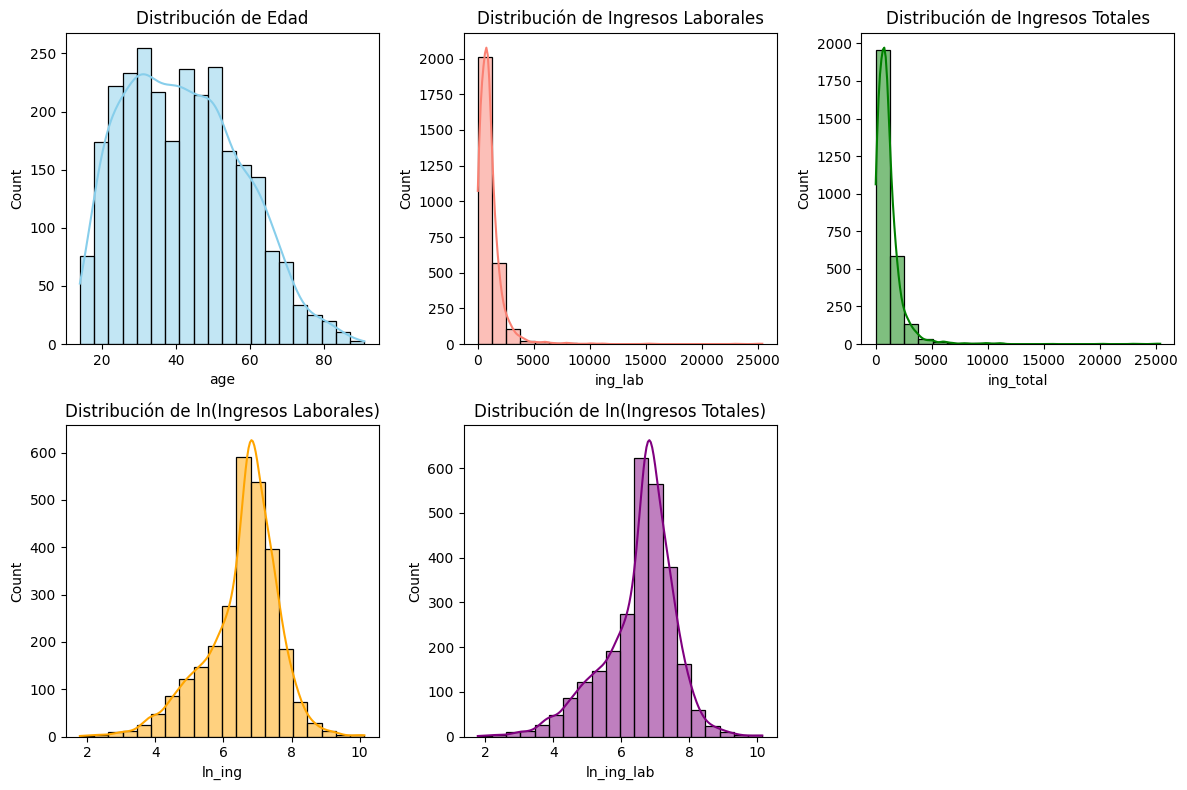

In [19]:
# Histogramas de variables continuas
plt.figure(figsize=(12, 8))
#CONSIDERAMOS A LA VARIABLE AGE
plt.subplot(2, 3, 1)
sns.histplot(lambayeque['age'], kde=True, bins=20, color='skyblue')
plt.title('Distribución de Edad')
#CONSIDERAMOS A LA VARIABLE ING_LAB
plt.subplot(2, 3, 2)
sns.histplot(lambayeque['ing_lab'], kde=True, bins=20, color='salmon')
plt.title('Distribución de Ingresos Laborales')
#CONSIDERAMOS A LA VARIABLE ING_TOTAL
plt.subplot(2, 3, 3)
sns.histplot(lambayeque['ing_total'], kde=True, bins=20, color='green')
plt.title('Distribución de Ingresos Totales')
#CONSIDERAMOS A LA VARIABLE LN_ING
plt.subplot(2, 3, 4)
sns.histplot(lambayeque['ln_ing'], kde=True, bins=20, color='orange')
plt.title('Distribución de ln(Ingresos Laborales)')
#CONSIDERAMOS A LA VARIABLE LN_ING_LAB
plt.subplot(2, 3, 5)
sns.histplot(lambayeque['ln_ing_lab'], kde=True, bins=20, color='purple')
plt.title('Distribución de ln(Ingresos Totales)')

plt.tight_layout()
plt.show()

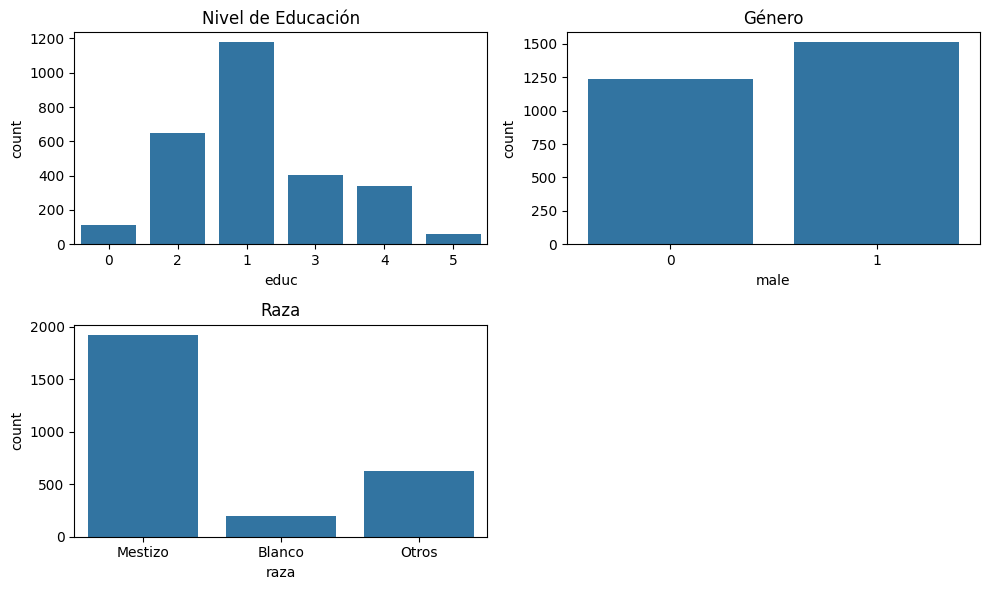

In [20]:
# Gráficos de barras de variables discretas
plt.figure(figsize=(10, 6))
#CONSIDERAMOS LA VARIABLE EDUCACION
plt.subplot(2, 2, 1)
sns.countplot(x='educ', data=lambayeque)
plt.title('Nivel de Educación')
#CONSIDERAMOS EL SEXO 
plt.subplot(2, 2, 2)
sns.countplot(x='male', data=lambayeque)
plt.title('Género')
#CONSIDERAMOS LA RAZA
plt.subplot(2, 2, 3)
sns.countplot(x='raza', data=lambayeque)
plt.title('Raza')

plt.tight_layout()
plt.show()

**Utilice boxplots para detectar la presencia de outliers en la variable objetivo. Evalúe individualmente y por cruces con categóricas. Ante lapresencia de outliers, abordarlos según recomendaciones de clase. (2 puntos)**

 

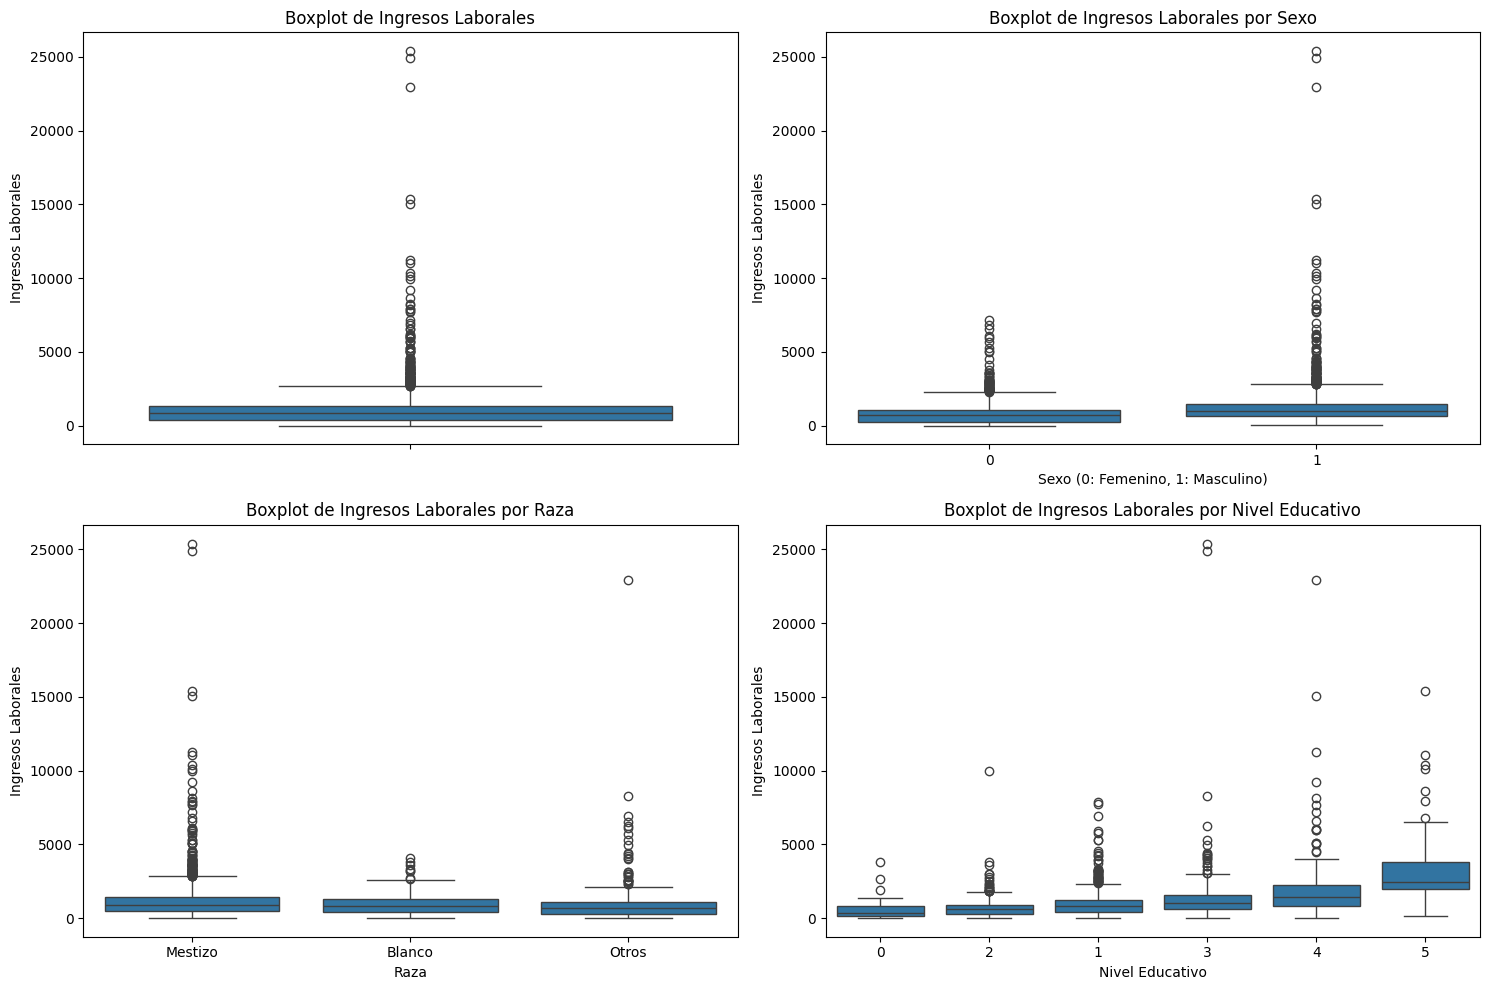

In [21]:
# Ajustar el tamaño de los gráficos
plt.figure(figsize=(15, 10))

# Boxplot individual para ing_lab
plt.subplot(2, 2, 1)
sns.boxplot(y=lambayeque['ing_lab'])
plt.title('Boxplot de Ingresos Laborales')
plt.ylabel('Ingresos Laborales')

# Boxplot de ing_lab por male (sexo)
plt.subplot(2, 2, 2)
sns.boxplot(x=lambayeque['male'], y=lambayeque['ing_lab'])
plt.title('Boxplot de Ingresos Laborales por Sexo')
plt.xlabel('Sexo (0: Femenino, 1: Masculino)')
plt.ylabel('Ingresos Laborales')

# Boxplot de ing_lab por raza
plt.subplot(2, 2, 3)
sns.boxplot(x=lambayeque['raza'], y=lambayeque['ing_lab'])
plt.title('Boxplot de Ingresos Laborales por Raza')
plt.xlabel('Raza')
plt.ylabel('Ingresos Laborales')

# Boxplot de ing_lab por educ (educación)
plt.subplot(2, 2, 4)
sns.boxplot(x=lambayeque['educ'], y=lambayeque['ing_lab'])
plt.title('Boxplot de Ingresos Laborales por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Ingresos Laborales')

plt.tight_layout()
plt.show()

**ANALIZANDO LA PRESENCIA DE OUTLIERS**

1.Boxplot de Ingresos Laborales:
Se observan varios puntos por encima del límite superior del bigote, esto indica la presencia de outliers en los ingresos laborales.

2.Boxplot de Ingresos Laborales por Sexo:
Tanto en el grupo de mujeres como en el grupo de hombres, hay outliers.

3.Boxplot de Ingresos Laborales por Raza:
Todos los grupos raciales (Mestizo, Blanco, Otros) tienen outliers.

4.Boxplot de Ingresos Laborales por Nivel Educativo:
Todos los niveles educativos tienen outliers, con una mayor concentración en niveles educativos superiores (especialmente en el nivel 4 (superior universitaria)).

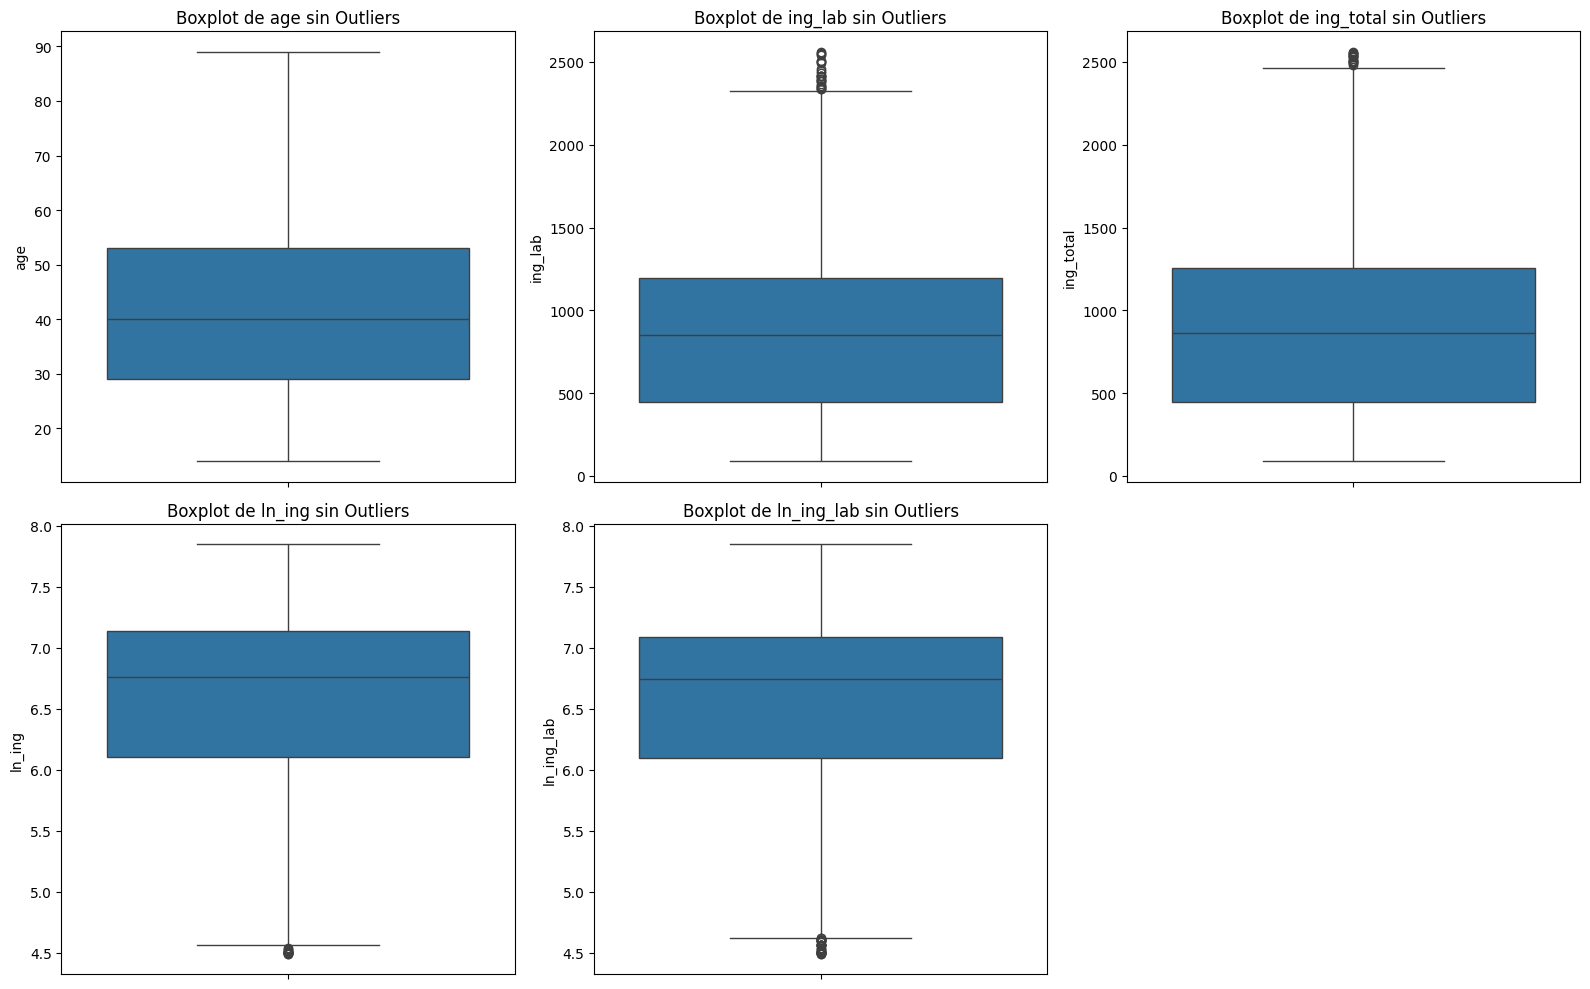

In [22]:
# eliminar outliers
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    filtro = (df[columna] >= (Q1 - 1.5 * IQR)) & (df[columna] <= (Q3 + 1.5 * IQR))
    return df[filtro]

# Lista de variables continuas
variables_continuas = ['age', 'ing_lab', 'ing_total', 'ln_ing', 'ln_ing_lab']

# Copia del DataFrame original para conservar los datos sin modificar
lambayeque_sin_outliers = lambayeque.copy()

# Eliminar outliers para cada variable continua
for var in variables_continuas:
    lambayeque_sin_outliers = eliminar_outliers(lambayeque_sin_outliers, var)

# Verificar la nueva distribución de las variables continuas sin outliers
plt.figure(figsize=(16, 10))

# Crear subplots para cada variable continua
for i, var in enumerate(variables_continuas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=lambayeque_sin_outliers[var])
    plt.title(f'Boxplot de {var} sin Outliers')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


**Analice la relación entre las variables mediante una matriz de correlaciones
(enfocado en la variable objetivo y para detectar multicolinealidad) y
gráficos de dispersión (enfocado solo en la variable objetivo contra
variables continuas). (2 puntos)**


In [23]:
#observo el tipo d evariable que tiene mi data frame 
lambayeque.dtypes

conglome        object
vivienda        object
hogar           object
age               int8
fac500a        float32
d544t          float64
educ          category
male          category
raza            object
exper          float32
pea           category
ing_lab        float32
ing_total      float32
ln_ing         float32
ln_ing_lab     float32
dtype: object

<Axes: >

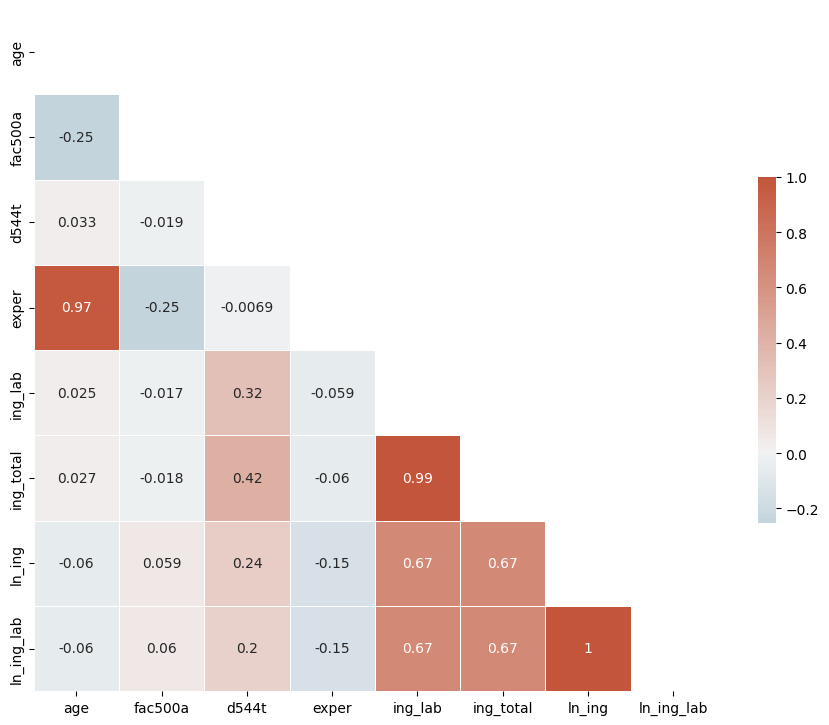

In [24]:
# Filtra solo columnas numéricas
lambayeque = lambayeque.select_dtypes(include=[np.number])
# Calcula la matriz de correlación entre las columnas de Lambayeque.
corr = lambayeque.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True)

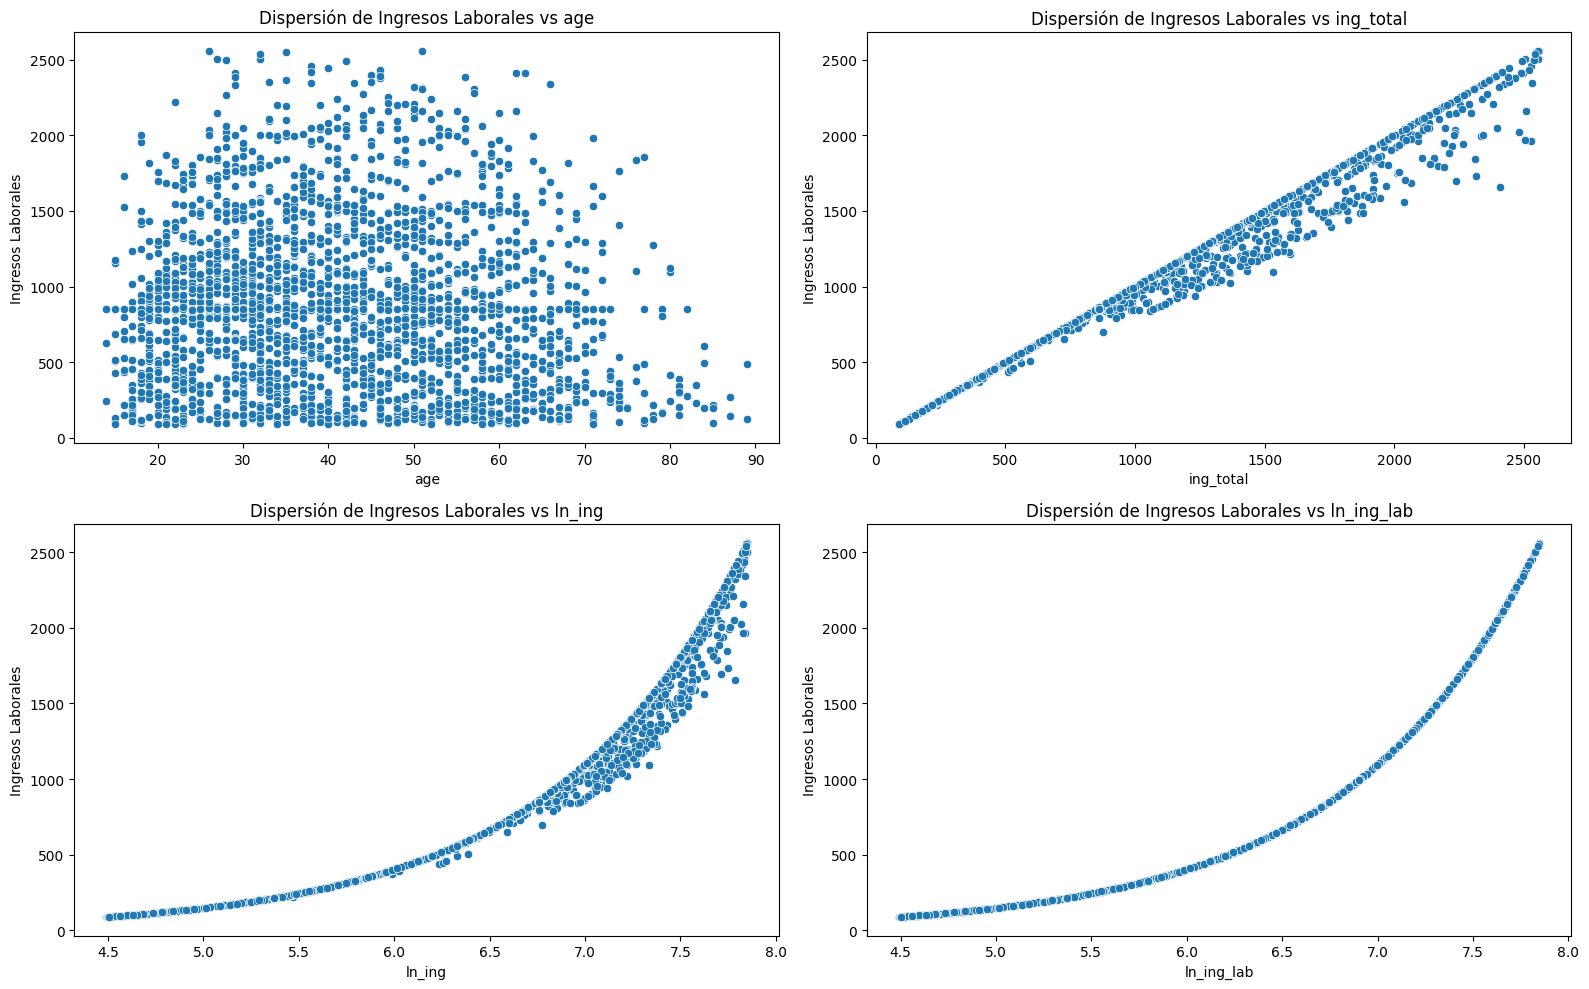

In [26]:
# Lista de variables continuas para graficar contra la variable objetivo
variables_continuas = ['age', 'ing_total', 'ln_ing', 'ln_ing_lab']

plt.figure(figsize=(16, 10))

# Crear subplots para cada gráfico de dispersión
for i, var in enumerate(variables_continuas, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=lambayeque_sin_outliers[var], y=lambayeque_sin_outliers['ing_lab'])
    plt.title(f'Dispersión de Ingresos Laborales vs {var}')
    plt.xlabel(var)
    plt.ylabel('Ingresos Laborales')

plt.tight_layout()
plt.show()


**Sobre los puntos anteriores, comente los patrones de información que considere más relevantes. Añada gráficos o estadísticos de creerlo necesario. (2 puntos)**


**1.Correlación entre exper y age:**

Existe una alta correlación positiva de 0.97 entre exper (experiencia laboral) y age (edad). Es decir, a medida que aumenta la edad, generalmente aumenta la experiencia laboral. Este patrón es esperado y no necesariamente indica multicolinealidad

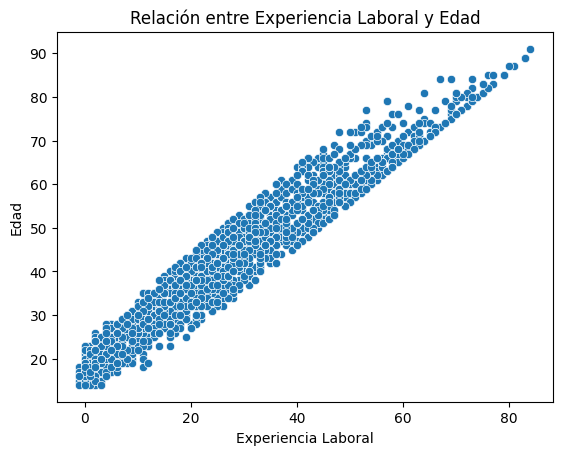

In [371]:
# Gráfico de dispersión de exper vs age
sns.scatterplot(data=lambayeque, x='exper', y='age')
plt.title('Relación entre Experiencia Laboral y Edad')
plt.xlabel('Experiencia Laboral')
plt.ylabel('Edad')
plt.show()


**2.Correlación entre ing_lab y ing_total:**

Existe una correlación muy alta de 0.99 entre ing_lab (ingreso laboral) y ing_total (ingreso total). Esto es comprensible ya que ing_total probablemente incluye ing_lab y posiblemente otros ingresos adicionales. Esta alta correlación indica redundancia y sugiere que ing_lab podría ser suficiente para algunos análisis en lugar de usar ing_total.

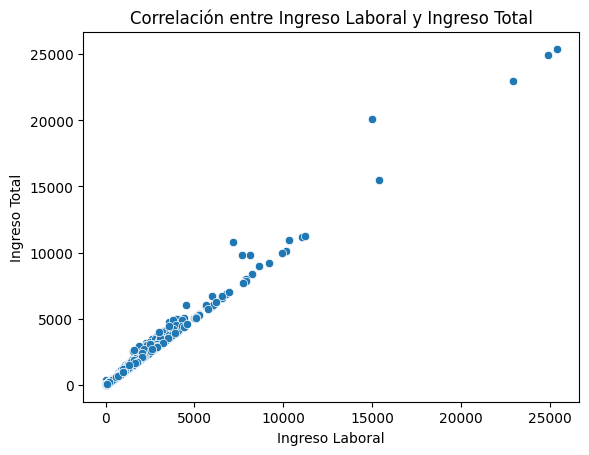

In [374]:
# Gráfico de dispersión de ing_lab vs ing_total
sns.scatterplot(data=lambayeque, x='ing_lab', y='ing_total')
plt.title('Correlación entre Ingreso Laboral y Ingreso Total')
plt.xlabel('Ingreso Laboral')
plt.ylabel('Ingreso Total')
plt.show()

**3.Correlación entre ln_ing y ln_ing_lab:**

ln_ing y ln_ing_lab muestran una correlación muy alta de 0.997, lo que indica que el logaritmo del ingreso total y del ingreso laboral están altamente relacionados. Esto puede sugerir que las transformaciones logarítmicas.

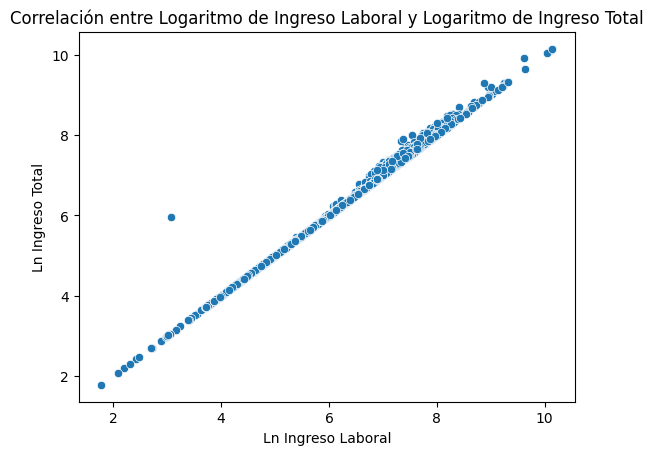

In [375]:
# Gráfico de dispersión de ln_ing vs ln_ing_lab
sns.scatterplot(data=lambayeque, x='ln_ing_lab', y='ln_ing')
plt.title('Correlación entre Logaritmo de Ingreso Laboral y Logaritmo de Ingreso Total')
plt.xlabel('Ln Ingreso Laboral')
plt.ylabel('Ln Ingreso Total')
plt.show()

In [27]:
############ EXPORTANDO BASE DE DATOS LAMBAYEQUE CON OUTLIERS CORREGIDOS, DUMMYS CREADAS,
# SOLO PARA EL DPTO. LAMBAYEQUE, PARA EL POSTERIOR TRABAJO EN R:

lambayeque_sin_outliers.to_csv("../data/interm/lambayeque_sin_outliers.csv", index=False)

